In [1]:
pip install pandas_datareader

In [2]:
#portfoliio optimization
#import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get the stock symbols/tickers

assest = ('HFCL.NS','TATAMOTORS.NS','TATAPOWER.NS','IDEA.NS','ZEEMEDIA.NS')

In [4]:
#assign wieghts to the port folio(my port folio)
weights = np.array([0.14, 0.04, 0.27, 0.43, 0.12])

In [5]:
#get the data of the stocks
startdate = '2020-04-01'
enddate = datetime.today().strftime('%Y-%m-%d')
enddate

'2021-01-20'

In [6]:
#create data frame to store the adj closing prices
df = pd.DataFrame()

for stock in assest:
    df[stock] = web.DataReader(stock,data_source='yahoo',start = startdate,end = enddate)['Adj Close']

In [7]:
#show df
df

,HFCL.NS,TATAMOTORS.NS,TATAPOWER.NS,IDEA.NS,ZEEMEDIA.NS
Date,,,,,
2020-04-01,8.850000,67.949997,30.565054,3.05,3.75
2020-04-03,8.750000,65.300003,29.208761,3.15,3.90
2020-04-07,9.300000,67.250000,32.599499,3.20,4.05
2020-04-08,9.550000,67.599998,34.537060,3.20,4.25
2020-04-09,10.150000,74.599998,35.360523,3.30,4.45
...,...,...,...,...,...
2021-01-14,33.250000,245.100006,85.949997,12.30,5.60
2021-01-15,31.900000,260.299988,85.550003,13.65,5.55
2021-01-18,30.100000,245.949997,82.099998,13.00,5.35


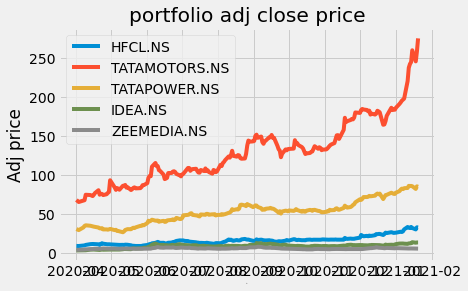

In [8]:
#show the port folio
title='portfolio adj close price'
my_stocks= df
for i in my_stocks.columns.values:
    plt.plot(my_stocks[i], label = i)
    
plt.title(title)
plt.xlabel('date',fontsize = 1)
plt.ylabel('Adj price')
plt.legend(my_stocks.columns.values,loc = 'upper left')
plt.show()

In [9]:
# show returns
returns = df.pct_change()
returns

,HFCL.NS,TATAMOTORS.NS,TATAPOWER.NS,IDEA.NS,ZEEMEDIA.NS
Date,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN
2020-04-03,-0.011299,-0.038999,-0.044374,0.032787,0.040000
2020-04-07,0.062857,0.029862,0.116086,0.015873,0.038462
2020-04-08,0.026882,0.005204,0.059435,0.000000,0.049383
2020-04-09,0.062827,0.103550,0.023843,0.031250,0.047059
...,...,...,...,...,...
2021-01-14,0.043956,0.010305,0.001165,0.004082,0.000000
2021-01-15,-0.040602,0.062015,-0.004654,0.109756,-0.008929
2021-01-18,-0.056426,-0.055129,-0.040327,-0.047619,-0.036036


In [10]:
# cov matrix
cov_matrix = returns.cov()*199

In [11]:
cov_matrix.style.background_gradient(cmap='viridis', axis=None).set_precision(2)

,HFCL.NS,TATAMOTORS.NS,TATAPOWER.NS,IDEA.NS,ZEEMEDIA.NS
HFCL.NS,0.37,0.09,0.07,0.15,0.06
TATAMOTORS.NS,0.09,0.26,0.08,0.13,0.04
TATAPOWER.NS,0.07,0.08,0.16,0.06,0.02
IDEA.NS,0.15,0.13,0.06,0.68,0.08
ZEEMEDIA.NS,0.06,0.04,0.02,0.08,0.21


In [12]:
#calculte the port folio varience
port_var = np.dot(weights.T,np.dot(cov_matrix,weights))
port_var

0.20579218073880676

In [13]:
#POrt VOlatility
port_vol = np.sqrt(port_var)
port_vol

0.45364323067671447

In [14]:
#calculate port folio return
pfanrt = np.sum(returns.mean()*weights)*199
pfanrt

1.3916411064255947

In [15]:
# expected retuns ,volatilty,var
percent_var = str(round(port_var,2)*100)+'%'
percent_vol = str(round(port_vol,2)*100)+'%'
percent_ret = str(round(pfanrt,2)*100)+'%'

print('expected retuns : '+ percent_ret)
print('expected risk : '+ percent_vol)
print('expected var : '+ percent_var)

expected retuns : 139.0%
expected risk : 45.0%
expected var : 21.0%


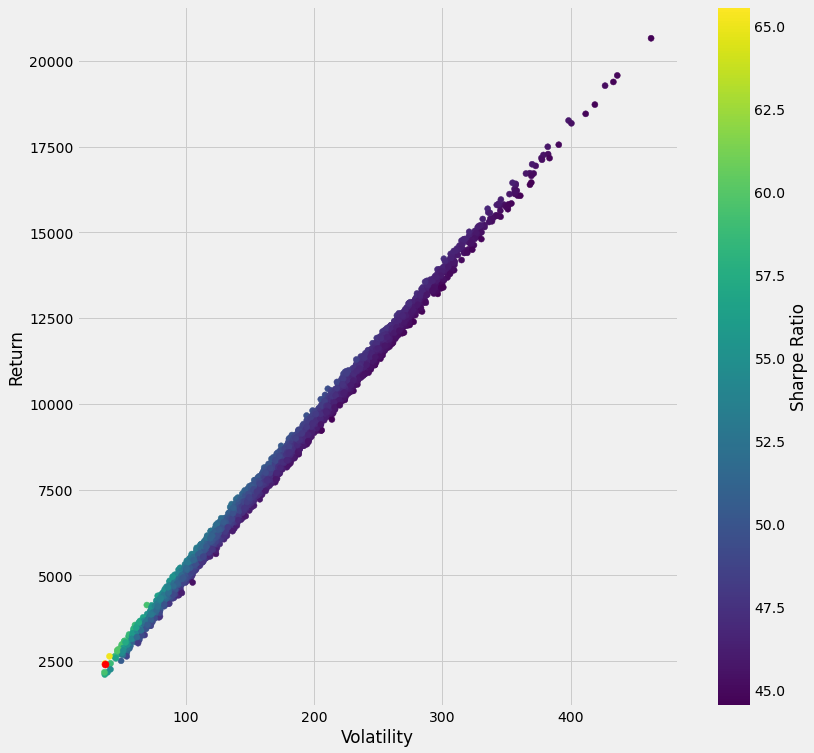

Max Sharpe Ratio is 65.58426073608148
Max Sharpe Ratio is in location 2734


In [16]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (df.mean() * weights * 199))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df.cov()*199, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
    
plt.figure(figsize=(12,12))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()
print('Max Sharpe Ratio is {}' .format(sharpe_arr.max()))
print('Max Sharpe Ratio is in location {}' .format(sharpe_arr.argmax()))      

In [17]:
all_weights[2734]

array([0.10660295, 0.01687102, 0.05847799, 0.1862156 , 0.63183245])

In [18]:
adj_wieghts= np.array([0.10660295, 0.01687102, 0.05847799, 0.1862156 , 0.63183245])

In [19]:
port_var = np.dot(adj_wieghts.T,np.dot(cov_matrix,adj_wieghts))
port_vol = np.sqrt(port_var)
pfanrt = np.sum(returns.mean()*adj_wieghts)*199

In [20]:
print('adj_portfolio_var : ',port_var)
print('adj_portfolio_vol : ',port_vol)
print('adj_portfolio_return : ',pfanrt)

adj_portfolio_var :  0.15001747825614847
adj_portfolio_vol :  0.3873208982951326
adj_portfolio_return :  0.8762201248827374
